# OpenCV - Part 5

- Basic Morphological Transform (Eroding & Dilating)
- Advance Morphological Transform (Opening, Closing, & Morphological Gradient)
- Morphological Operation (Structuring Element)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Basic Morphological Transform (Eroding & Dilating)

- A set of operations that process images based on shapes. 
- Morphological operations apply a structuring element to an input image and generate an output image.
- Usecase :
    - Removing noise
    - Isolation of individual elements and joining disparate elements in an image.
    - Finding of intensity bumps or holes in an image

#### Dilation
- This operations consists of convolving an image $A$ with some **kernel** ($B$), which can have any shape or size, usually a **square** or **circle**.
- The kernel $B$ has a defined **anchor point**, usually being the center of the kernel.
- As the kernel $B$ is scanned over the image, we compute the maximal pixel value overlapped by $B$ and **replace** the image pixel in the **anchor point** position with that **maximal value**. 
- This maximizing operation causes **bright regions** within an image to **"grow"** (therefore the name dilation). <br>
<img src="resource/Original_Image.png" style="width:100px; margin-top:10px;"></img>
<img src="resource/Dilation.png" style="width:100px; margin-top:10px;"></img> <br>
<span style="width:100px; padding:5px;">Original Image</span>
<span style="width:100px; padding:5px;">Dilation Image</span>
- Dilation function `cv2.dilate(img, kernel, anchor, iterations)`
- Where :
    - `img` : Input image
    - `kernel` : kernel matrix (ndarray), created using `np.ones()` or `cv2.getStructuringElement()` 
    - `anchor` : Evaluated pixel value on the kernel position, default (-1, -1) as Center of kernel.
    - `iterations` : Number of times dilation aplied to input image.
    
#### Erosion
- This operation  computes a **local minimum** over the area of given kernel.
- As the kernel $B$ is scanned over the image, we compute the minimal pixel value overlapped by $B$ and replace the image pixel under the **anchor point** with that **minimal value**.<br>
<img src="resource/Original_Image.png" style="width:100px; margin-top:10px;"></img>
<img src="resource/Erosion.png" style="width:100px; margin-top:10px;"></img> <br>
<span style="width:100px; padding:5px;">Original Image</span>
<span style="width:100px; padding:5px;">Erosion Image</span>
- Eroding function `cv2.erode(img, kernel, anchor, iterations)`
- Where :
    - `img` : Input image
    - `kernel` : kernel matrix (ndarray), created using `np.ones()` or `cv2.getStructuringElement()` 
    - `anchor` : Evaluated pixel value on the kernel position, default (-1, -1) as Center of kernel.
    - `iterations` : Number of times erotion aplied to input image.

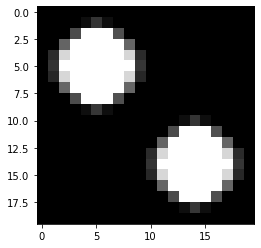

In [2]:
frame = np.zeros((20,20),np.uint8)
cv2.circle(frame, (5,5), 3, (255,255,255), -1, cv2.LINE_AA)
cv2.circle(frame, (14,14), 3, (255,255,255), -1, cv2.LINE_AA)
plt.imshow(frame, cmap="gray")

- create **square kernel**

In [17]:
kernel = np.ones((3,3),np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


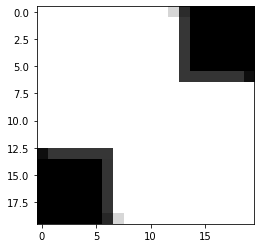

In [16]:
dilate = cv2.dilate(frame.copy(), kernel, iterations = 4)
plt.imshow(dilate, cmap="gray")

In [27]:
kernel = np.ones((3,3),np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


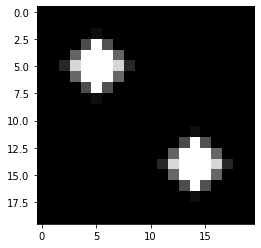

In [28]:
eroding = cv2.erode(frame.copy(), kernel, iterations = 1)
plt.imshow(eroding, cmap="gray")

### Denoising Citra MRI menggunakan Eroding 

- Penggunaan `cv2.erode()` + square kernel mirip dengan `cv2.blur()`

In [30]:
img = cv2.imread('noisy_mri.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(gray, kernel, iterations = 1)

cv2.imshow("Erosion", erosion)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Fixing Broken Character menggunakan Dilating

In [35]:
img = cv2.imread('Broker_Char.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5),np.uint8)
dilating = cv2.dilate(thresh, kernel, iterations = 5)

cv2.imshow("Dilating", dilating)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Menambahkan Trackbar

In [36]:
iteration = 1
kernel_size = 3
title_window = "Ditation Image"

def on_trackbar_iteration(val):
    if val > 0 :
        global iteration
        iteration = val
        kernel = np.ones((kernel_size,kernel_size),np.uint8)
        dilating = cv2.dilate(thresh, kernel, iterations = iteration)
        cv2.imshow(title_window, dilating)
        
def on_trackbar_kernel_size(val):
    if val > 0 :
        global kernel_size
        kernel_size = val
        kernel = np.ones((kernel_size,kernel_size),np.uint8)
        dilating = cv2.dilate(thresh, kernel, iterations = iteration)
        cv2.imshow(title_window, dilating)
    

img = cv2.imread('Broker_Char.png')

cv2.namedWindow(title_window)
cv2.createTrackbar('kernel', title_window , 3, 10, on_trackbar_kernel_size)
cv2.createTrackbar('iteration', title_window , 1, 10, on_trackbar_iteration)

on_trackbar_kernel_size(3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task

- define kernel (numpy ones)
- Apply eroding untuk menghilangkan dot puih (noise)
- Apply dilating untuk menyempurnakan karakter (menyambungkan gap)
- Apply Eroding kembali agar ukuranya kembali normal
- Atur iterasi pada eroding dan dilating agar dapat sesuai seperti berikut :
<br>
<img src="resource/task1.PNG" style="width:400px"></img>

In [ ]:
# --- Jawaban ----
#
#
#

In [119]:
img = cv2.imread('Noised_Broken_Char.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 3)
dilating = cv2.dilate(erosion, kernel, iterations = 9)
normalize = cv2.erode(dilating, kernel, iterations = 7)

cv2.imshow("Erosion", erosion)
cv2.imshow("Dilating", dilating)
cv2.imshow("Original", img)
cv2.imshow("normalize", normalize)
cv2.waitKey(0)
cv2.destroyAllWindows()


___
## Advance Morphological Transform 
### Opening, Closing, & Morphological Gradient

- Advance Morphological Transform use `cv2.morphologyEx(img, morphological_type, kernel, iterations)`
- where :
    - `img` : input image
    - `morphological_type` : 
        - **Opening** : `cv2.MORPH_OPEN` (**erosion followed by dilation**. It is useful in **removing noise**.)<br>
        <img src="resource/opening.png" style="width:200px"></img>
        - **Closing** : `cv2.MORPH_CLOSE` (**Dilation followed by Erosion**. It is useful in **closing small holes** inside the foreground objects)<br>
        <img src="resource/closing.png" style="width:200px"></img>
        - **Morphological Gradient** : `cv2.MORPH_GRADIENT` (The result will look like the outline of the object.)<br>
        <img src="resource/gradient.png" style="width:200px"></img>
    - `kernel` : kernel matrix (ndarray), created using np.ones() or cv2.getStructuringElement()
    - `iterations` : Number of times method (opening/closing/Gradient) aplied to input image.

#### Opening & Closing

- Implementation Opening on Noisy MRI Image
- Object scale after opening similar to original

In [40]:
img = cv2.imread('noisy_mri.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)

cv2.imshow("Opening", opening)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Implementation Closing on Broken Char Image
- Object scale after closing similar to original

In [41]:
img = cv2.imread('Broken_Char_2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=3)

cv2.imshow("Closing", closing)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Implementation Opening and Closing on Noised & Broken Char Image
    - remove noise using opening
    - join the gap using closing

In [43]:
img = cv2.imread('Noised_Broken_Char.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=7)

cv2.imshow("Opening", opening)
cv2.imshow("Closing", closing)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Morphological Gradient
- Because dilation and erosion mostly affect the pixels that are close to the boundary between the foreground and background, their difference generally yields the boundary and thus this is used for **edge detection and segmentation tasks**.

In [44]:
img = cv2.imread('Char.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)

# gradient using erosion and dilation
erosion = cv2.erode(thresh, kernel, iterations = 1)
dilation = cv2.dilate(thresh, kernel, iterations = 1)
gradient1 = dilation - erosion

# Morphological Gradient
gradient2 = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel, iterations = 1)

cv2.imshow("Gradient", gradient1)
cv2.imshow("Morphological Gradient", gradient2)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Implementasi Morphological Gradient | **Tackling non-uniform illumination in images**

- Using Simple Thresholding

In [59]:
img = cv2.imread('StrukBelanja.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow("Otsu", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Simple Thresholding (Binary)
![](resource/th_binary_ilumination.png)
- Simple Thresholding (To Zero)
![](resource/th_tzr_ilumination.png)

- Using Morphological Gradient

In [60]:
img = cv2.imread('StrukBelanja.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((2,2),np.uint8)

gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)

cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Morphological Gradient
![](resource/morph_grad_ilumination.png)

- Implementasi Pada Fingerprint image with non-uniform illumination

In [61]:
img = cv2.imread('Fingerprint.png')
img = cv2.bitwise_not(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)

cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("To Zero", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task :

- read image `number_plate.jpg`
- apply morphological gradient, kernel 3x3, iteration 1
- apply tozero thresholding, threshold = 100, maxVal = 255
- find contour method RETR_EXTERNAL, mode CHAIN_APPROX_NONE
- draw contour, color red, thicness 1 <br>
<img src="resource/plate_number.png" style="width:300px;" ></img>

In [120]:
# ------ Jawaban ------
#
#
#

In [119]:
img = cv2.imread('number_plate.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)
ret, thresh = cv2.threshold(gradient, 100, 255, cv2.THRESH_TOZERO)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0,0,255), 1)

cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("Edge - Thresholding", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___

## Morhological Operation | Structuring Element

- method `cv2.getStructuringElement (shape, ksize, anchor)`
- where :
    - `shape`:
        - `cv2.MORPH_RECT` : a rectangular structuring element
        ```
       [[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]]
        ```
        - `cv2.MORPH_CROSS` : a cross-shaped structuring element
        ```
       [[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]]
        ```
        - `cv2.MORPH_ELLIPSE` : an elliptic structuring element
        ```
       [[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]]
        ```
    - `ksize` : tuple of kernel size, (3,3)
    - `anchor` : Evaluated pixel value on the kernel position, default (-1, -1) as Center of kernel.

In [65]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [67]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [68]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [93]:
img = cv2.imread('Broker_Char.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 5))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)

cv2.imshow("Closing", closing)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
kernel

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=uint8)

### Removing staff line from musical sheet (no balok)

In [94]:
img = cv2.imread("not_balok.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

cv2.imshow("Gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [95]:
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("Binary", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Detect Line on Image

In [96]:
h, w, c = img.shape
horizontal_size = w // 30

horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

print(horizontalStructure)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1]]


In [98]:
horizontalStructure.shape

(1, 45)

In [99]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontalStructure, iterations=1)

cv2.imshow("Detected Staff Line | Opening", opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Segmentasi Not Balok

In [100]:
vertical_size = h // 30

verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

print(verticalStructure)

[[1]
 [1]
 [1]
 [1]]


In [101]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, verticalStructure, iterations=1)

cv2.imshow("Detected Item | Opening", opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [103]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0,0,255), 1)
    
cv2.imshow("Musical Sheet Segmentation", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### PR

- extract line & charcater dari gambar `handwritting.jpg`, sehingga dihasilkan :

![](resource/task2.png)


In [210]:
img = cv2.imread("handwritting.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))

detected_line = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontalStructure, iterations=1)

cv2.imshow("Detected Line", detected_line)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [211]:
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 4))

detected_char = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, verticalStructure, iterations=1)

cv2.imshow("Detected Char", detected_char)
cv2.imshow("Detected Line", detected_line)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Sumber
- [tutorial_erosion_dilatation](https://docs.opencv.org/master/db/df6/tutorial_erosion_dilatation.html)
- [tutorial_py_morphological_ops](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html)
- [tutorial_morph_lines_detection](https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html)